In [7]:
import numpy as np
import matplotlib.pyplot as plt
from quant_met import mean_field, plotting, geometry, parameters
import scienceplots

In [8]:
WIDTH = 2.584 * 2
plt.style.use(['./thesis.mplstyle', "science", "grid", "muted"])

In [9]:
graphene_lattice = geometry.GrapheneLattice(lattice_constant=np.sqrt(3))
n = 1000  # number of points across the whole k space path
t_gr = 1
t_x = 0.01
band_path, band_path_plot, ticks, labels = graphene_lattice.generate_high_symmetry_path(number_of_points=n)

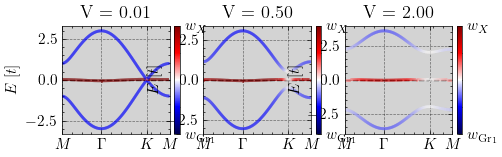

In [14]:
V_list = [0.01, 0.5, 2]

fig, axs = plt.subplots(nrows=1, ncols=len(V_list), figsize=(WIDTH, WIDTH / 2))

for V, ax in zip(V_list, axs):
    dressed_graphene_h = mean_field.hamiltonians.DressedGraphene(
        parameters=parameters.DressedGrapheneParameters(
            hopping_gr=t_gr, hopping_x=t_x, hopping_x_gr_a=V, lattice_constant=graphene_lattice.lattice_constant, chemical_potential=0, hubbard_int_orbital_basis=[0.0, 0.0, 0.0]
        )
    )
    
    band_structure = dressed_graphene_h.calculate_bandstructure(band_path, overlaps=np.array([[0, 0, 1], [1, 0, 0]]))
    
    bands = band_structure[['band_0', 'band_1', 'band_2']]
    overlaps = band_structure[['wx_0', 'wx_1', 'wx_2']]
    
    plotting.plot_bandstructure(bands=bands.to_numpy().T, overlaps=overlaps.to_numpy().T, k_point_list=band_path_plot, ticks=ticks, labels=labels, ax_in=ax, fig_in=fig, overlap_labels=[r"$w_{\mathrm{Gr}_1}$", r"$w_X$"])
    
    ax.set_title(f'V = {V:.2f}')
    ax.tick_params(axis='x')
    
fig.savefig('dressed graphene bands.pgf')